# Using APIs and Intro to Machine Learning
#### Connor Leggett

## Using an API

In [1]:
# Importing necessary libraries
import urllib
import requests
import time

### Generating random jeopardy questions

In [2]:
# A function to Display information from a question Dictionary:
def display_question(question):
    print("Category: " + question["category"]["title"])
    print("Q: " + question["question"])
    time.sleep(7)
    print("A: " + question["answer"])


# The URL of the API I will be making requests to:
url = "http://jservice.io/api/random"

# Making the URL Request
random_question = requests.get(url).json()[0]

# Displaying Question
display_question(random_question)



Category: shakespeare
Q: I'm talkin' Shakespeare, Claudio & Isabella...talkin' Pompey...Lucio & the Duke, say hey! to this play
A: <i>Measure for Measure</i>


### Finding Song Lyrics

In [8]:
# Base URL:
base_url = "https://api.lyrics.ovh/v1/"

# User's input
title = input("Title: ")
artist = input("Artist: ")

# Create a new url based on users requests:
final_url = base_url + artist + '/' + title

data = requests.get(final_url).json()

# Making sure the API returned a value
try:
    print("\n\n" + data['lyrics'])
except KeyError:
    print("Song not found")

# For requests with optional arguments, look up: urllib.parse.urlencode()

Title: this is cs50
Artist: David malan
Song not found


## Data Science

In [4]:
# Necessary imports:
import json
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import random

### K Means Clustering 

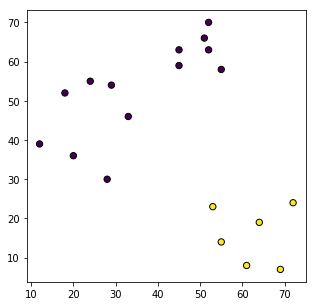

In [11]:
# Creating a pandas dataframe
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

# Alternatively, use random datasets
"""
rands1 = [random.randint(0,100) for i in range(100)]
rands2 = [random.randint(0,100) for i in range(100)]
df = pd.DataFrame({
    'x': rands1,
    'y': rands2
})
"""

# Using the sklearn KMeans algorithm to group data
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

# Accessing the central points of each group 
centroids = kmeans.cluster_centers_

# Accessing the labels of each point
labels = kmeans.labels_


# Plotting the results below
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'], df['y'], c=labels.astype(np.float), edgecolor='k', s=40)

    



### K Nearest Neighbors

## Citation

@inproceedings{sklearn_api,
  author    = {Lars Buitinck and Gilles Louppe and Mathieu Blondel and
               Fabian Pedregosa and Andreas Mueller and Olivier Grisel and
               Vlad Niculae and Peter Prettenhofer and Alexandre Gramfort
               and Jaques Grobler and Robert Layton and Jake VanderPlas and
               Arnaud Joly and Brian Holt and Ga{\"{e}}l Varoquaux},
  title     = {{API} design for machine learning software: experiences from the scikit-learn
               project},
  booktitle = {ECML PKDD Workshop: Languages for Data Mining and Machine Learning},
  year      = {2013},
  pages = {108--122},
}

#### Inspiration for this project came from a similar instructive project created by Johnny Berman that can be found here: github.com/JohnnyBerman/HCS-Data-Science-Bootcamp
